In [1]:

import matplotlib.pyplot as plt 
import numpy as np   
from matplotlib.colors import LogNorm
import lsdb
from catalog_filtering import bandFilterStrict, bandFilterLenient

In [2]:
catalog = lsdb.read_hipscat('hipscat/des_one_deg/')
df = catalog.compute()
df

,COADD_OBJECT_ID,TILENAME,HPIX_32,HPIX_64,HPIX_1024,HPIX_4096,HPIX_16384,RA,DEC,ALPHAWIN_J2000,...,SPREADERR_MODEL_Z,SPREADERR_MODEL_Y,WAVG_SPREADERR_MODEL_G,WAVG_SPREADERR_MODEL_R,WAVG_SPREADERR_MODEL_I,WAVG_SPREADERR_MODEL_Z,WAVG_SPREADERR_MODEL_Y,Norder,Dir,Npix
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
10369036472354340864,1346141230,b'DES0253-0458',9209,36838,9430583,150889339,2414229435,42.950463,-4.879251,42.950463,...,0.009731,0.029193,0.00374,0.005885,-99.0,-99.0,-99.0,5,0,9209
10369036480038305792,1346141080,b'DES0253-0458',9209,36838,9430583,150889339,2414229437,42.958301,-4.877688,42.958301,...,0.00158,0.007929,-99.0,0.002601,0.001679,0.001619,-99.0,5,0,9209
10369036489592930304,1346140789,b'DES0253-0458',9209,36838,9430583,150889339,2414229439,42.956789,-4.874656,42.956789,...,0.007904,0.01972,-99.0,0.007817,-99.0,-99.0,-99.0,5,0,9209
10369036591480963072,1346140402,b'DES0253-0458',9209,36838,9430583,150889341,2414229463,42.992555,-4.871413,42.992555,...,0.014692,1.0,-99.0,-99.0,-99.0,-99.0,-99.0,5,0,9209
10369036592256909312,1346140290,b'DES0253-0458',9209,36838,9430583,150889341,2414229463,42.995277,-4.870418,42.995277,...,0.00545,0.015111,-99.0,-99.0,0.004745,0.009687,-99.0,5,0,9209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10374613677125926912,1342655681,b'DES0251-0250',9214,36858,9435656,150970498,2415527980,42.792149,-2.890874,42.792149,...,0.005174,0.0188,0.005104,0.00286,0.003379,0.006346,-99.0,4,0,2303
10374613697543798784,1342655477,b'DES0251-0250',9214,36858,9435656,150970499,2415527984,42.803405,-2.888575,42.803405,...,0.011156,0.024927,-99.0,-99.0,-99.0,-99.0,-99.0,4,0,2303
10374613767550926848,1342655483,b'DES0251-0250',9214,36858,9435656,150970500,2415528001,42.82643,-2.888667,42.82643,...,0.018927,0.032851,-99.0,-99.0,-99.0,-99.0,-99.0,4,0,2303


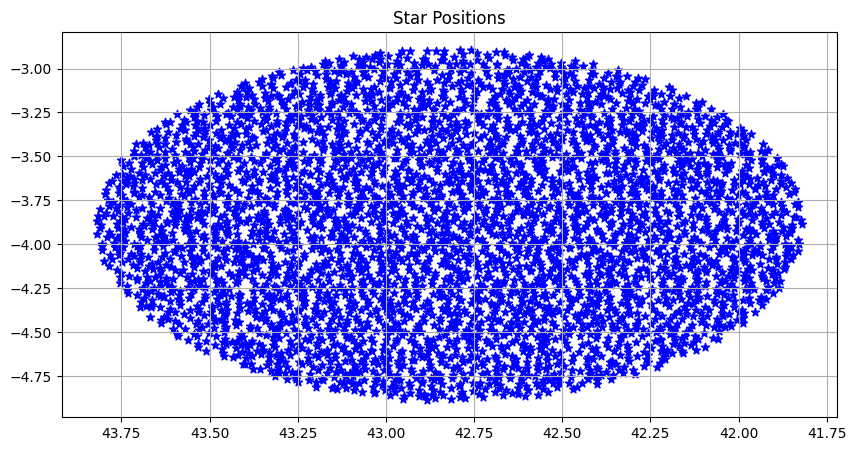

420911


In [3]:
ra = df['RA']
raShifted = np.where(ra > 180, ra - 360, ra)
raShifted100 = raShifted[::1000]
dec = df['DEC']

plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
ax.scatter(raShifted[::100], dec[::100], c='blue', marker='*')
plt.gca().invert_xaxis()
# Set plot title and labels
plt.title('Star Positions')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

print(len(df))



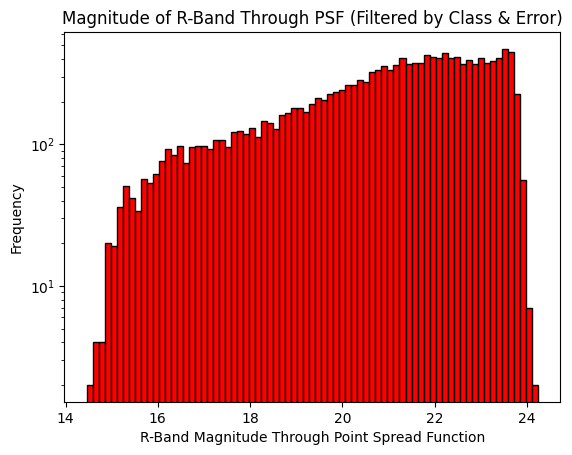

In [3]:
filteredDf = df.query(bandFilterStrict(['R'], classStar = 0.95, spreadModel = None, magError = 0.05, flag = True, invalidMags = True))


plt.hist(filteredDf['WAVG_MAG_PSF_R'], edgecolor = 'black', color = 'red', bins = 75)
plt.xlabel('R-Band Magnitude Through Point Spread Function')
plt.ylabel('Frequency')
plt.title('Magnitude of R-Band Through PSF (Filtered by Class & Error)')
plt.yscale('log')



23.966014862060547
15.035654067993164
1.679941177368164


Text(0.5, 1.0, 'R-I & G-R Magnitudes (Filtered)')

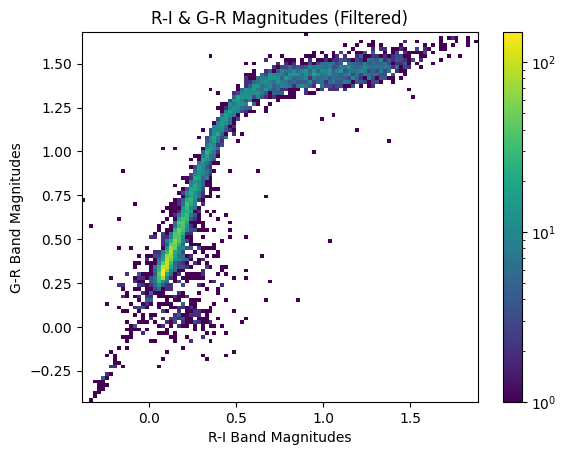

In [4]:
bandList = ['G','R','I']

filteredDf = df.query(bandFilterStrict(bandList, classStar = 0.95, spreadModel = None, flag = True, magError = 0.05, invalidMags=True))



GMinusR = filteredDf['WAVG_MAG_PSF_G'] - filteredDf['WAVG_MAG_PSF_R']
RMinusI = filteredDf['WAVG_MAG_PSF_R'] - filteredDf['WAVG_MAG_PSF_I']
print(max(filteredDf['WAVG_MAG_PSF_G']))
print(min(filteredDf['WAVG_MAG_PSF_R']))
print(max(GMinusR))

plt.hist2d(RMinusI, GMinusR, bins = 100, norm=LogNorm())
plt.xlabel('R-I Band Magnitudes')
plt.ylabel('G-R Band Magnitudes')
plt.colorbar()
plt.title('R-I & G-R Magnitudes (Filtered)')

Text(0.5, 1.0, 'R-I & I-Y Magnitudes (Filtered)')

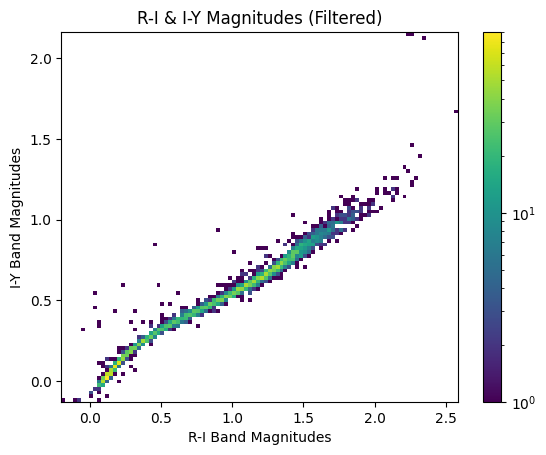

In [5]:
bandList = ['Y','R','I']

filteredDf = df.query(bandFilterStrict(bandList, classStar = 0.95, spreadModel = None, flag = True, magError = 0.05, invalidMags=True))


IMinusY = filteredDf['WAVG_MAG_PSF_I'] - filteredDf['WAVG_MAG_PSF_Y']
RMinusI = filteredDf['WAVG_MAG_PSF_R'] - filteredDf['WAVG_MAG_PSF_I']

plt.hist2d(RMinusI, IMinusY, bins = 100, norm=LogNorm())
plt.xlabel('R-I Band Magnitudes')
plt.ylabel('I-Y Band Magnitudes')
plt.colorbar()
plt.title('R-I & I-Y Magnitudes (Filtered)')

WAVG_MAG_PSF_Y > 0 and WAVG_MAG_PSF_Y < 90 and WAVG_MAG_PSF_R > 0 and WAVG_MAG_PSF_R < 90 and WAVG_MAG_PSF_I > 0 and WAVG_MAG_PSF_I < 90 and WAVG_MAG_PSF_G > 0 and WAVG_MAG_PSF_G < 90
                      COADD_OBJECT_ID         TILENAME  HPIX_32  HPIX_64  \
_hipscat_index                                                             
10369036617783443456       1346139947  b'DES0253-0458'     9209    36838   
10369036649953755136       1346140631  b'DES0253-0458'     9209    36838   
10369036650889084928       1346140540  b'DES0253-0458'     9209    36838   
10369036662108848128       1346141023  b'DES0253-0458'     9209    36838   
10369036678261112832       1346139897  b'DES0253-0458'     9209    36838   
...                               ...              ...      ...      ...   
10374613493172142080       1342656885  b'DES0251-0250'     9214    36858   
10374613552244719616       1342655909  b'DES0251-0250'     9214    36858   
10374613634851536896       1342656156  b'DES0251-0250'  

Text(0.5, 1.0, 'R-I & I-Y Magnitudes (Unfiltered)')

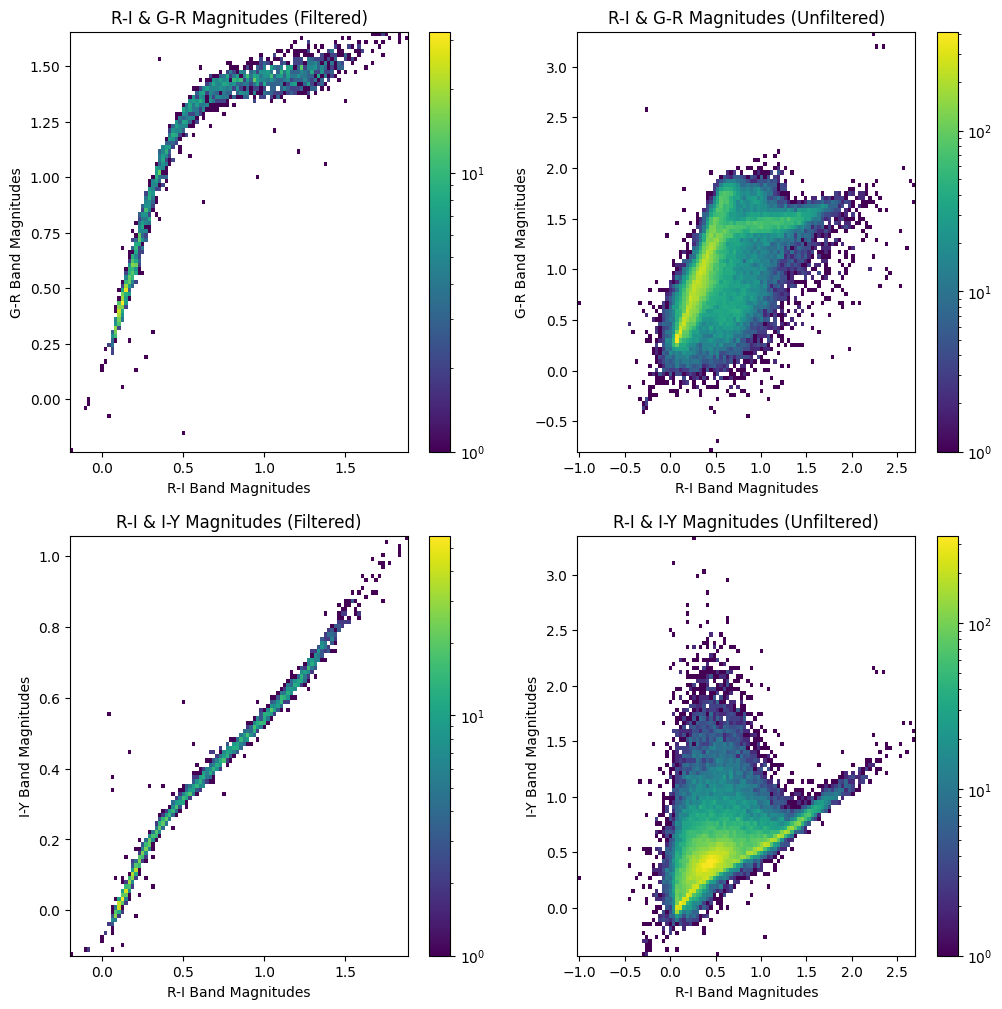

In [3]:
bandList = ['Y','R','I', 'G']
filteredDf = df.query(bandFilterStrict(bandList, classStar = 0.95, flag = True, magError = 0.05, invalidMags = True))
qs = bandFilterStrict(bandList, classStar = None, spreadModel = None, flag = False, invalidMags = True)
posDf =  df.query(qs)




FIMinusY = filteredDf['WAVG_MAG_PSF_I'] - filteredDf['WAVG_MAG_PSF_Y']
FRMinusI = filteredDf['WAVG_MAG_PSF_R'] - filteredDf['WAVG_MAG_PSF_I']
FGMinusR = filteredDf['WAVG_MAG_PSF_G'] - filteredDf['WAVG_MAG_PSF_R']

IMinusY = posDf['WAVG_MAG_PSF_I'] - posDf['WAVG_MAG_PSF_Y']
RMinusI = posDf['WAVG_MAG_PSF_R'] - posDf['WAVG_MAG_PSF_I']
GMinusR = posDf['WAVG_MAG_PSF_G'] - posDf['WAVG_MAG_PSF_R']


plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
plt.hist2d(FRMinusI, FGMinusR, bins = 100, norm=LogNorm())
plt.xlabel('R-I Band Magnitudes')
plt.ylabel('G-R Band Magnitudes')
plt.colorbar()
plt.title('R-I & G-R Magnitudes (Filtered)')

plt.subplot(2, 2, 2)
plt.hist2d(RMinusI, GMinusR, bins = 100, norm=LogNorm())
plt.xlabel('R-I Band Magnitudes')
plt.ylabel('G-R Band Magnitudes')
plt.colorbar()
plt.title('R-I & G-R Magnitudes (Unfiltered)')

plt.subplot(2,2,3)
plt.hist2d(FRMinusI, FIMinusY, bins = 100, norm=LogNorm())
plt.xlabel('R-I Band Magnitudes')
plt.ylabel('I-Y Band Magnitudes')
plt.colorbar()
plt.title('R-I & I-Y Magnitudes (Filtered)')

plt.subplot(2,2,4)
plt.hist2d(RMinusI, IMinusY, bins = 100, norm=LogNorm())
plt.xlabel('R-I Band Magnitudes')
plt.ylabel('I-Y Band Magnitudes')
plt.colorbar()
plt.title('R-I & I-Y Magnitudes (Unfiltered)')


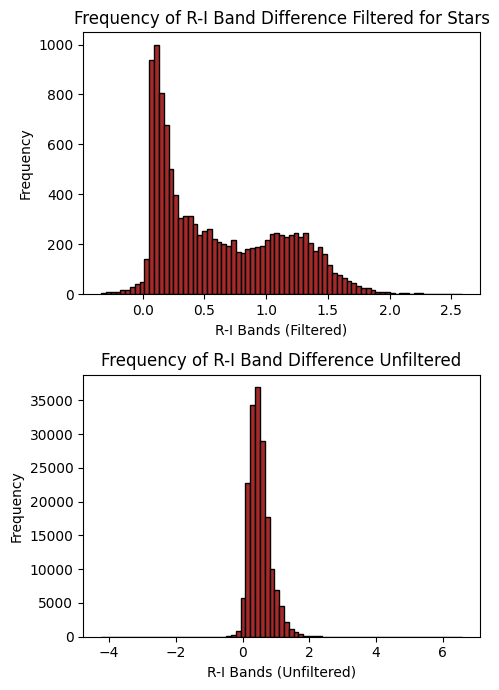

In [4]:
bandList = ['R','I']
s1 = bandFilterStrict(bandList, classStar = 0.95, spreadModel = None, flag = True, magError = 0.05, invalidMags = True)
s2 = bandFilterStrict(bandList, classStar = None, spreadModel = None, flag = False, magError = None, invalidMags=True)

filteredDf = df.query(s1)
posDf =  df.query(s2)

FRMinusI = filteredDf['WAVG_MAG_PSF_R'] - filteredDf['WAVG_MAG_PSF_I']
RMinusI = posDf['WAVG_MAG_PSF_R'] - posDf['WAVG_MAG_PSF_I']

plt.figure(figsize=(5,7))
plt.subplot(2,1,1)
plt.hist(FRMinusI, edgecolor='black', color='brown',bins=75)
plt.yscale='log'
plt.xlabel('R-I Bands (Filtered)')
plt.ylabel('Frequency')
plt.title('Frequency of R-I Band Difference Filtered for Stars')

plt.subplot(2,1,2)
plt.hist(RMinusI, edgecolor='black',color='brown',bins=75)
plt.yscale='log'
plt.title('Frequency of R-I Band Difference Unfiltered')
plt.xlabel('R-I Bands (Unfiltered)')
plt.ylabel('Frequency')

plt.tight_layout()

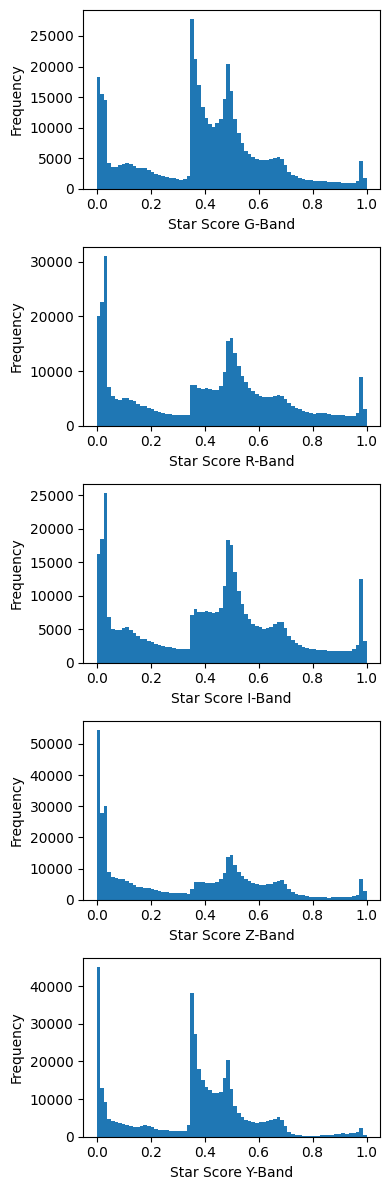

In [17]:
bands = ['G','R','I','Z','Y']

plt.figure(figsize=(4,12))
for i in range(len(bands)):
    plt.subplot(5, 1, i+1)
    plt.hist(df[f'CLASS_STAR_{bands[i]}'], bins = 75)
    plt.xlabel(f'Star Score {bands[i]}-Band')
    plt.ylabel('Frequency')

plt.tight_layout()

Text(0.5, 1.0, 'R-I & I-Y Magnitudes (Class_Star = 0.5)')

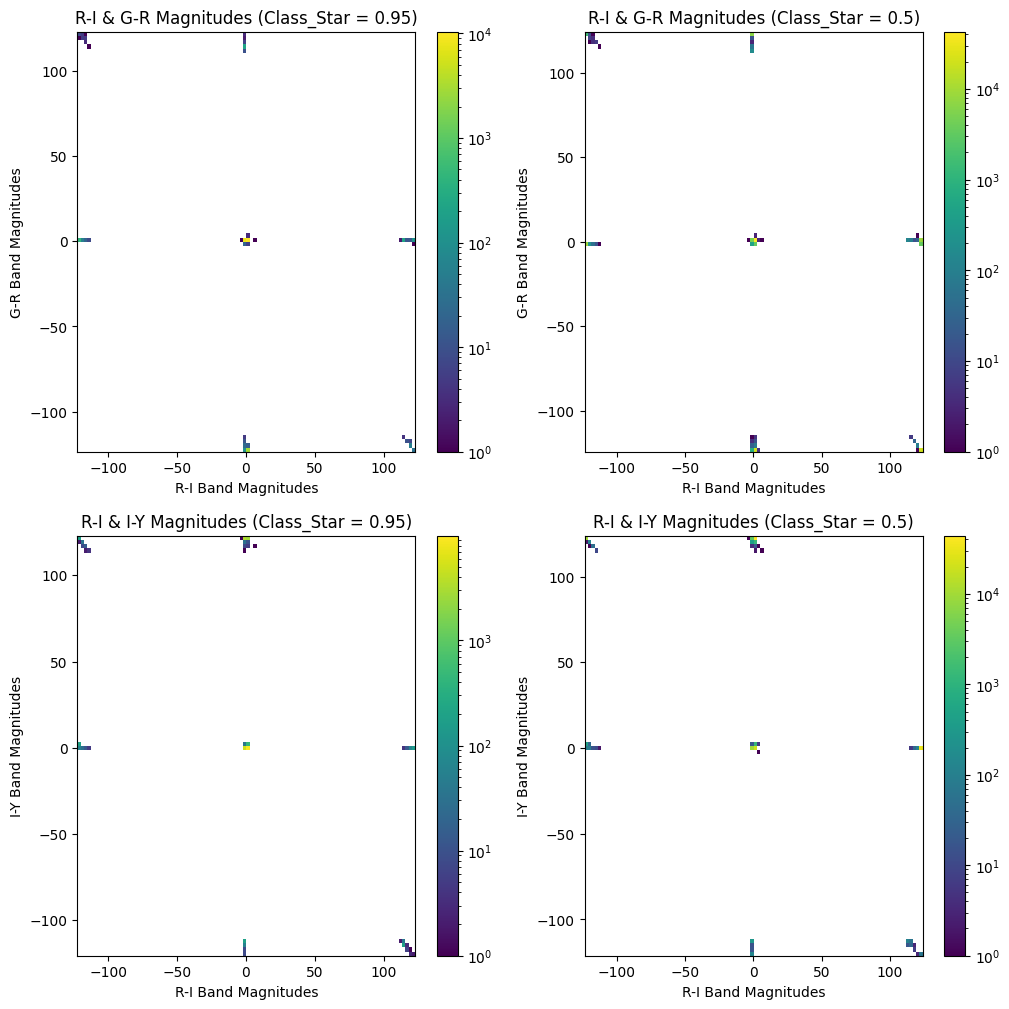

In [5]:



bandList = ['Y','R','I', 'G']
StrictClassDf = df.query(bandFilterLenient(bandList, classStar = 0.95, spreadModel = None, flag = False, magError = None, invalidMags=True))
LenientClassDf =  df.query(bandFilterLenient(bandList, classStar = 0.5, spreadModel = None, flag = False, magError = None, invalidMags=True))

SIMinusY = StrictClassDf['WAVG_MAG_PSF_I'] - StrictClassDf['WAVG_MAG_PSF_Y']
SRMinusI = StrictClassDf['WAVG_MAG_PSF_R'] - StrictClassDf['WAVG_MAG_PSF_I']
SGMinusR = StrictClassDf['WAVG_MAG_PSF_G'] - StrictClassDf['WAVG_MAG_PSF_R']


IMinusY = LenientClassDf['WAVG_MAG_PSF_I'] - LenientClassDf['WAVG_MAG_PSF_Y']
RMinusI = LenientClassDf['WAVG_MAG_PSF_R'] - LenientClassDf['WAVG_MAG_PSF_I']
GMinusR = LenientClassDf['WAVG_MAG_PSF_G'] - LenientClassDf['WAVG_MAG_PSF_R']


plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
plt.hist2d(SRMinusI, SGMinusR, bins = 100, norm=LogNorm())
plt.xlabel('R-I Band Magnitudes')
plt.ylabel('G-R Band Magnitudes')
plt.colorbar()
plt.title('R-I & G-R Magnitudes (Class_Star = 0.95)')

plt.subplot(2, 2, 2)
plt.hist2d(RMinusI, GMinusR, bins = 100, norm=LogNorm())
plt.xlabel('R-I Band Magnitudes')
plt.ylabel('G-R Band Magnitudes')
plt.colorbar()
plt.title('R-I & G-R Magnitudes (Class_Star = 0.5)')

plt.subplot(2,2,3)
plt.hist2d(SRMinusI, SIMinusY, bins = 100, norm=LogNorm())
plt.xlabel('R-I Band Magnitudes')
plt.ylabel('I-Y Band Magnitudes')
plt.colorbar()
plt.title('R-I & I-Y Magnitudes (Class_Star = 0.95)')

plt.subplot(2,2,4)
plt.hist2d(RMinusI, IMinusY, bins = 100, norm=LogNorm())
plt.xlabel('R-I Band Magnitudes')
plt.ylabel('I-Y Band Magnitudes')
plt.colorbar()
plt.title('R-I & I-Y Magnitudes (Class_Star = 0.5)')